# **Deep Learning Project: Street View Housing Number Digit Recognition**

# **Marks: 60**

--------------
## **Context**
--------------

One of the most interesting tasks in deep learning is to recognize objects in natural scenes. The ability to process visual information using machine learning algorithms can be very useful as demonstrated in various applications.

The SVHN dataset contains over 600,000 labeled digits cropped from street-level photos. It is one of the most popular image recognition datasets. It has been used in neural networks created by Google to improve the map quality by automatically transcribing the address numbers from a patch of pixels. The transcribed number with a known street address helps pinpoint the location of the building it represents.

----------------
## **Objective**
----------------

Our objective is to predict the number depicted inside the image by using Artificial or Fully Connected Feed Forward Neural Networks and Convolutional Neural Networks. We will go through various models of each and finally select the one that is giving us the best performance.

-------------
## **Dataset**
-------------
Here, we will use a subset of the original data to save some computation time. The dataset is provided as a .h5 file. The basic preprocessing steps have been applied on the dataset.

## **Mount the drive**

Let us start by mounting the Google drive. You can run the below cell to mount the Google drive.

In [1]:
## Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Importing the necessary libraries**

In [2]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import h5py
import tensorflow as tf #
from tensorflow.keras.models import Sequential #
from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization #
from tensorflow.keras.losses import categorical_crossentropy #
from tensorflow.keras.optimizers import Adam #
from tensorflow.keras.utils import to_categorical #from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

**Let us check the version of tensorflow.**

In [3]:
# Check TensorFlow Version
print(tf.__version__)

2.18.0


## **Load the dataset**

- Let us now load the dataset that is available as a .h5 file.
- Split the data into the train and the test dataset.

In [4]:
h5f = h5py.File('/content/drive/MyDrive/MIT Data Science/SVHN_DATA/SVHN_single_grey1.h5', 'r')

X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]

h5f.close()

Check the number of images in the training and the testing dataset.

In [ ]:
# count number of images in dataset
len(X_train), len(X_test)

(42000, 18000)

**Observation:** There are 42,000 pictures for training and 18,000 pictures for testing.

---



## **Visualizing images**

- Use X_train to visualize the first 10 images.
- Use Y_train to print the first 10 labels.

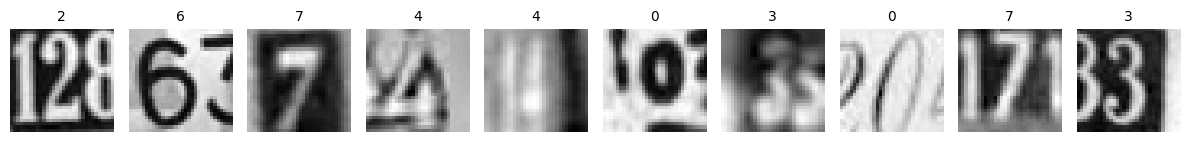

Labels for the above images: [2 6 7 4 4 0 3 0 7 3]


In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 10, figsize=(12, 2))

for i, ax in enumerate(axes):
    ax.imshow(X_train[i], cmap="gray")
    ax.axis("off")
    ax.set_title(y_train[i], fontsize=10)

plt.tight_layout()
plt.show()

print("Labels for the above images:", y_train[:10])


## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [ ]:
# Show sample data
print("Shape of the first image:", X_train[0].shape)
print()
print("Data Type:", X_train.dtype)
print()
print("First 3 rows of the image:\n", X_train[0][:3])

Shape of the first image: (32, 32)

Data Type: float32

First 3 rows of the image:
 [[ 33.0704  30.2601  26.852   25.8844  28.5421  33.1673  33.9069  31.277
   27.3313  23.9556  21.3518  22.5258  24.2868  31.2322  37.2917  38.1776
   30.8902  24.4887  27.983   23.3641  19.7774  23.0159  24.7168  24.9941
   27.5701  38.5474  52.8341  65.9037  73.5609  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765  40.96    54.0358  60.7317  57.5965  47.9611
   33.0103  24.3362  24.3793  33.1997  44.1339  61.1815  80.5278  86.1744
   79.7621  66.5893  47.4926  29.7548  21.8804  22.9943  25.2822  26.6303
   39.7923  64.9531  91.0815 108.8795 113.6079 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763  69.6815  91.8381 101.2887  97.0719  72.8832
   41.1944  23.0975  32.0319  55.8077  82.2242 104.4069 113.9329 116.5197
  117.7646 111.6512  83.8758  53.9974  32.4664  22.3256  23.4179  32.2491
   61.2093  99.8526 117.9217 117.4272 110.1398 113.3028 121.775  115.4228]]


In [ ]:
#Reshape data into 2D array
X_train = X_train.reshape(X_train.shape[0], 1024)
X_test = X_test.reshape(X_test.shape[0], 1024)

### **Normalize the train and the test data**

In [9]:
# Normalize inputs from 0-255 to 0-1

X_train = X_train / 255.0
X_test = X_test / 255.0
print("Min pixel value in X_train:", X_train.min())
print("Max pixel value in X_train:", X_train.max())

Min pixel value in X_train: 0.0
Max pixel value in X_train: 0.9999


Print the shapes of Training and Test data

In [ ]:
# show reshaped data
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (42000, 1024)
X_test shape: (18000, 1024)
y_train shape: (42000,)
y_test shape: (18000,)


### **One-hot encode output**

In [11]:
# Convert labels to one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print("New y_train shape:", y_train.shape)
print("New y_test shape:", y_test.shape)

print("Sample vectors from y_train:")
print(y_train[:3])  # Check Output


New y_train shape: (42000, 10)
New y_test shape: (18000, 10)
Sample vectors from y_train:
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


**Observation:** There are 42,000 training samples with a 10D one hot vector. There are 18,000 test samples with 10 classes.


## **Model Building**

Now that we have done the data preprocessing, let's build an ANN model.

### Fix the seed for random number generators

In [ ]:
#generate random seed
np.random.seed(50)
import random
random.seed(50)
tf.random.set_seed(50)

### **Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **64 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **32 nodes and the relu activation**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_1 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train an ANN model as per the above mentioned architecture.**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam

# define model
def nn_model_1():
    model = Sequential()

    model.add(Input(shape=(1024,)))  # input layer

    # add layers
    model.add(Dense(64, activation='relu'))  # first hidden layer
    model.add(Dense(32, activation='relu'))  # second hidden layer
    model.add(Dense(10, activation='softmax'))  # output layer

    # compile the model
    model.compile(
        loss='categorical_crossentropy',
        optimizer=Adam(learning_rate=0.001),
        metrics=['accuracy']
    )

    return model

# initialize the model
model_1 = nn_model_1()

# print the model summary
model_1.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 68,010 (265.66 KB)

 Trainable params: 68,010 (265.66 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import numpy as np

# check shape
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

# check for missing values
print("Any NaN in X_train:", np.isnan(X_train).sum())
print("Any NaN in y_train:", np.isnan(y_train).sum())

# check labels - one hot
print("First 3 y_train samples:\n", y_train[:3])


X_train shape: (42000, 1024)
y_train shape: (42000, 10)
Any NaN in X_train: 0
Any NaN in y_train: 0
First 3 y_train samples:
 [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


In [15]:
#check google collab to GPU
#encountered error when running w/o CPU or GPU
import tensorflow as tf
print("GPU Available:", tf.config.list_physical_devices('GPU'))

GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
history_model_1 = model_1.fit(
    X_train, y_train,           # training data
    validation_split=0.2,       # 20% of training data used for validation
    batch_size=128,             # number of samples
    epochs=20,                  # number of training epochs
    verbose=1                   # show training progress
)

Epoch 1/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.1137 - loss: 2.3036 - val_accuracy: 0.2082 - val_loss: 2.1825
Epoch 2/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2500 - loss: 2.0948 - val_accuracy: 0.4218 - val_loss: 1.7259
Epoch 3/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4580 - loss: 1.6451 - val_accuracy: 0.5177 - val_loss: 1.4815
Epoch 4/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5351 - loss: 1.4502 - val_accuracy: 0.5546 - val_loss: 1.3831
Epoch 5/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5745 - loss: 1.3530 - val_accuracy: 0.5831 - val_loss: 1.3213
Epoch 6/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5959 - loss: 1.2900 - val_accuracy: 0.6046 - val_loss: 1.2707
Epoch 7/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6127 - loss: 1.2451 - val_accuracy: 0.6199 - val_loss: 1.2335
Epoch 8/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6252 - loss: 1.2109 - val_accuracy: 0

### **Plot the Training and Validation Accuracies and write down your Observations.**

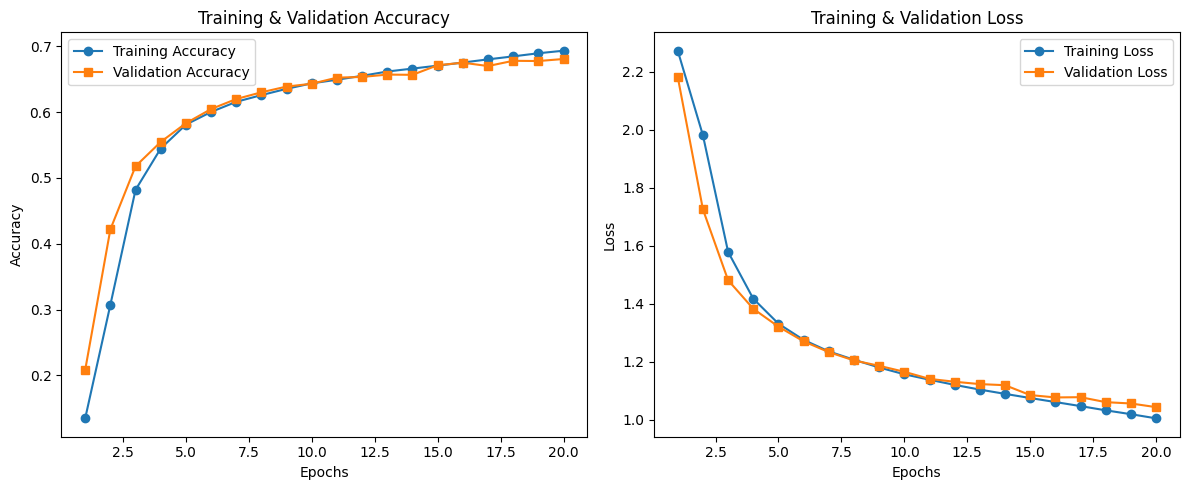

In [ ]:
import matplotlib.pyplot as plt

# accuracy and loss from the history object
train_acc = history_model_1.history['accuracy']
val_acc = history_model_1.history['val_accuracy']
train_loss = history_model_1.history['loss']
val_loss = history_model_1.history['val_loss']

# create a figure for accuracy and loss plots
plt.figure(figsize=(12, 5))

# plot Training and Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Training Accuracy', marker='o')
plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation Accuracy', marker='s')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()

# plot Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss', marker='o')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss', marker='s')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

**Observations:**  The training and validation accuracy both improving over epochs reaching close to 70% at the 20th epoch.

Let's build one more model with higher complexity and see if we can improve the performance of the model.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [ ]:
# clear previous session
from tensorflow.keras import backend
backend.clear_session()

In [ ]:
# set random seed
np.random.seed(50)
import random
random.seed(50)
tf.random.set_seed(50)

### **Second Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **256 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **128 nodes and the relu activation**
 - Add the **Dropout layer with the rate equal to 0.2**
 - Third hidden layer with **64 nodes and the relu activation**
 - Fourth hidden layer with **64 nodes and the relu activation**
 - Fifth hidden layer with **32 nodes and the relu activation**
 - Add the **BatchNormalization layer**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 -Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.0005), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_2 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the new ANN model as per the above mentioned architecture**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

def nn_model_2():
    model = Sequential()

    # first hidden layer with 256 nodes
    model.add(Dense(256, activation='relu', input_shape=(1024,)))

    # second hidden layer with 128 nodes
    model.add(Dense(128, activation='relu'))

    # dropout layer to prevent overfitting
    model.add(Dropout(0.2))

    # third hidden layer with 64 nodes
    model.add(Dense(64, activation='relu'))

    # fourth hidden layer with 64 nodes
    model.add(Dense(64, activation='relu'))

    # fifth hidden layer with 32 nodes
    model.add(Dense(32, activation='relu'))

    # batch normalization
    model.add(BatchNormalization())

    # output layer
    model.add(Dense(10, activation='softmax'))

    # compile
    model.compile(
        loss='categorical_crossentropy',
        optimizer=Adam(learning_rate=0.0005),
        metrics=['accuracy']
    )

    return model


In [ ]:
# show summary
model_2 = nn_model_2()
model_2.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │         262,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 310,250 (1.18 MB)

 Trainable params: 310,186 (1.18 MB)

 Non-trainable params: 64 (256.00 B)

In [ ]:
# define model
history_model_2 = model_2.fit(
    X_train, y_train,       # training data
    validation_split=0.2,   # 20% of training data used for validation
    batch_size=128,         # batch size for training
    epochs=30,              # number of epochs
    verbose=1               # display training progress
)


Epoch 1/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.1032 - loss: 2.4620 - val_accuracy: 0.1010 - val_loss: 2.3265
Epoch 2/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1130 - loss: 2.3069 - val_accuracy: 0.1775 - val_loss: 2.2367
Epoch 3/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2703 - loss: 1.9848 - val_accuracy: 0.4845 - val_loss: 1.6804
Epoch 4/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4946 - loss: 1.5026 - val_accuracy: 0.5465 - val_loss: 1.3885
Epoch 5/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5807 - loss: 1.2804 - val_accuracy: 0.6435 - val_loss: 1.1182
Epoch 6/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6340 - loss: 1.1402 - val_accuracy: 0.6574 - val_loss: 1.0727
Epoch 7/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6589 - loss: 1.0731 - val_accuracy: 0.6771 - val_loss: 1.0155
Epoch 8/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6748 - loss: 1.0210 - val_accuracy: 0

### **Plot the Training and Validation Accuracies and write down your Observations.**

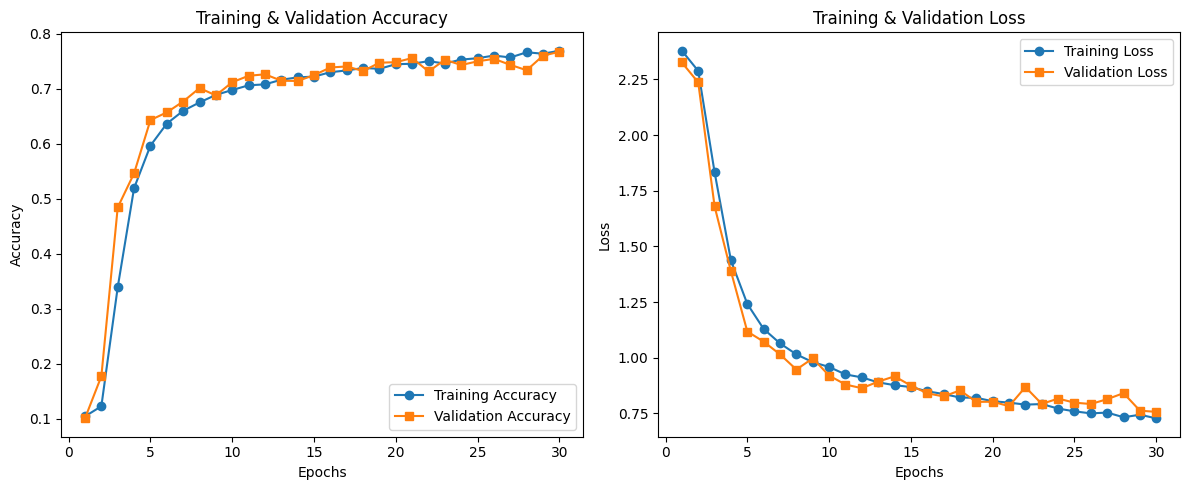

In [ ]:
import matplotlib.pyplot as plt

# accuracy and loss
train_acc = history_model_2.history['accuracy']
val_acc = history_model_2.history['val_accuracy']
train_loss = history_model_2.history['loss']
val_loss = history_model_2.history['val_loss']

# accuracy and loss plots figure
plt.figure(figsize=(12, 5))

# plot 1
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Training Accuracy', marker='o')
plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation Accuracy', marker='s')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()

# plot 2
plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss', marker='o')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss', marker='s')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()

# display plots
plt.tight_layout()
plt.show()

**Observations:**  Model 2 has a higher accuracy than model 1, which is close to 78%.  Model 2 also has a lower validation loss than model 1. Model 2's learning rate is slower than Model 1, but overall Model 1 is more accurate.

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

In [ ]:
# predictions
test_pred = model_2.predict(X_test)
test_pred = np.argmax(test_pred, axis = -1)

563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [ ]:
# converting each entry to single label from one-hot encoded vector
y_test = np.argmax(y_test, axis = -1)

In [26]:
print("y_test shape:", y_test.shape)


y_test shape: (18000,)


In [ ]:
# show shape
print("y_test shape:", y_test.shape)
print("First 10 values of y_test:", y_test[:10])  # Check sample values

y_test shape: (18000,)
First 10 values of y_test: [1 7 2 9 0 9 1 8 4 4]


In [28]:
y_test_labels = y_test

In [ ]:
# show updated shape
print("y_test_labels shape:", y_test_labels.shape)
print("First 10 values of y_test_labels:", y_test_labels[:10])
print("Unique values in y_test_labels:", np.unique(y_test_labels))

y_test_labels shape: (18000,)
First 10 values of y_test_labels: [1 7 2 9 0 9 1 8 4 4]
Unique values in y_test_labels: [0 1 2 3 4 5 6 7 8 9]


### **Print the classification report and the confusion matrix for the test predictions. Write your observations on the final results.**

Classification Report:

              precision    recall  f1-score   support

           0     0.8325    0.7784    0.8046      1814
           1     0.6585    0.8671    0.7485      1828
           2     0.8819    0.7083    0.7856      1803
           3     0.7449    0.7272    0.7359      1719
           4     0.7583    0.8433    0.7985      1812
           5     0.7450    0.6776    0.7097      1768
           6     0.7677    0.7811    0.7744      1832
           7     0.7015    0.8695    0.7765      1808
           8     0.7876    0.6854    0.7330      1812
           9     0.8363    0.6796    0.7498      1804

    accuracy                         0.7623     18000
   macro avg     0.7714    0.7617    0.7617     18000
weighted avg     0.7715    0.7623    0.7619     18000



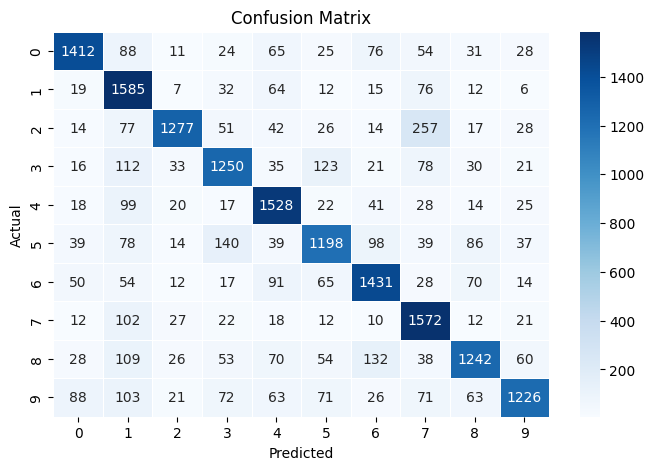

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# classification report
print("Classification Report:\n")
print(classification_report(y_test_labels, test_pred, digits=4))

# confusion matrix
cm = confusion_matrix(y_test_labels, test_pred)

# heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt='.0f', cmap='Blues', linewidths=0.5)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')

# show plot
plt.show()




**Final Observations:** The ANN model identifies digits 0, 4, 7, and 9 with the highest precision and recall (F1 scores). The model had issues identifying 5 the most out of all digits, due to low precision and recall (compared to other digits).

## **Using Convolutional Neural Networks**

### **Load the dataset again and split the data into the train and the test dataset.**

Check the number of images in the training and the testing dataset.

In [ ]:
import h5py

# open file
file_path = "/content/drive/MyDrive/MIT Data Science/SVHN_DATA/SVHN_single_grey1.h5"  # Update path if necessary
h5f = h5py.File(file_path, 'r')

# list all keys
print("Keys in HDF5 file:", list(h5f.keys()))

Keys in HDF5 file: ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']


In [35]:
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]

X_val = h5f['X_val'][:]  # Validation set
y_val = h5f['y_val'][:]

X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]

# Close the file
h5f.close()

# Print shapes to confirm
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)



X_train shape: (42000, 32, 32)
y_train shape: (42000,)
X_val shape: (60000, 32, 32)
y_val shape: (60000,)
X_test shape: (18000, 32, 32)
y_test shape: (18000,)


In [ ]:
# Reshape for channel dimension
X_train = X_train.reshape(-1, 32, 32, 1)
X_val = X_val.reshape(-1, 32, 32, 1)
X_test = X_test.reshape(-1, 32, 32, 1)

# set pixel values to range 0-1
X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0

# Show shape
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("X_test shape:", X_test.shape)


X_train shape: (42000, 32, 32, 1)
X_val shape: (60000, 32, 32, 1)
X_test shape: (18000, 32, 32, 1)


In [ ]:
from tensorflow.keras.utils import to_categorical

# labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_val = to_categorical(y_val, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# print new shapes
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)
print("y_test shape:", y_test.shape)

y_train shape: (42000, 10)
y_val shape: (60000, 10)
y_test shape: (18000, 10)


In [ ]:
import h5py

file_path = "/content/drive/MyDrive/MIT Data Science/SVHN_DATA/SVHN_single_grey1.h5" 

h5f = h5py.File(file_path, 'r')

# list keys
print("Keys in HDF5 file:", list(h5f.keys()))


Keys in HDF5 file: ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']


In [41]:
# Load data correctly
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]

X_val = h5f['X_val'][:]  # Validation data
y_val = h5f['y_val'][:]

X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]

# Close the file
h5f.close()

# Confirm shapes
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (42000, 32, 32)
y_train shape: (42000,)
X_val shape: (60000, 32, 32)
y_val shape: (60000,)
X_test shape: (18000, 32, 32)
y_test shape: (18000,)


In [42]:
len(X_train), len(X_test)

(42000, 18000)

**Observation:**  There are 42,000 pictures in the training data set, and 18,000 in the test data set.


## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Reshape the train and the test dataset because we always have to give a 4D array as input to CNNs.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [43]:
print("Shape:", X_train[0].shape)
print()
print("First image:\n", X_train[0])

Shape: (32, 32)

First image:
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


Reshape the dataset to be able to pass them to CNNs. Remember that we always have to give a 4D array as input to CNNs

In [44]:
X_train = X_train.reshape(X_train.shape[0], 32, 32, 1)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 1)

Normalize inputs from 0-255 to 0-1

In [45]:
X_train = X_train / 255.0
X_test = X_test / 255.0

Print New shape of Training and Test

In [47]:
print('Training data:', X_train.shape, y_train.shape)
print('Test data:', X_test.shape, y_test.shape)

Training data: (42000, 32, 32, 1) (42000,)
Test data: (18000, 32, 32, 1) (18000,)


### **One-hot encode the labels in the target variable y_train and y_test.**

In [ ]:
from tensorflow.keras.utils import to_categorical

# labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Print shape
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Show a sample one-hot encoded
print("Sample y_train label:", y_train[0])


y_train shape: (42000, 10)
y_test shape: (18000, 10)
Sample y_train label: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


**Observation:**  There are 42,000 training samples and each label has 10 classes.


## **Model Building**

Now that we have done data preprocessing, let's build a CNN model.
Fix the seed for random number generators

In [49]:
np.random.seed(69)
import random
random.seed(69)
tf.random.set_seed(69)

### **Model Architecture**
- **Write a function** that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Another **LeakyRelu** with the **slope equal to 0.1**
 - A **max-pooling layer** with a **pool size of 2x2**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_1 and store the output in a new variable.
- Print the summary of the model.
- Fit the model on the training data with a **validation split of 0.2, batch size = 32, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train a CNN model as per the above mentioned architecture.**

In [ ]:
# Import necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, LeakyReLU
from tensorflow.keras.optimizers import Adam

# CNN model architecture
def cnn_model_1():
    model = Sequential()

    # First Layer
    model.add(Conv2D(16, (3, 3), padding='same', input_shape=(32, 32, 1)))
    model.add(LeakyReLU(alpha=0.1))  # LeakyReLU activation

    # Second Layer
    model.add(Conv2D(32, (3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))  # LeakyReLU activation

    # Max-Pooling Layer
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flatten layer to transition to Fully Connected Layer
    model.add(Flatten())

    # Dense Layer with 32 neurons
    model.add(Dense(32))
    model.add(LeakyReLU(alpha=0.1))  # LeakyReLU activation

    # layer with softmax activation for 10 classes
    model.add(Dense(10, activation='softmax'))

    # compile
    model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

    return model


In [51]:
# Create the CNN model
cnn_model = cnn_model_1()

# Print model summary
cnn_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 32, 32, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │         262,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 267,306 (1.02 MB)

 Trainable params: 267,306 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [52]:
# Fit the model on the training data
history_cnn_model_1 = cnn_model.fit(
    X_train, y_train,  # Training data
    validation_split=0.2,  # 20% of training data used for validation
    batch_size=32,  # Number of samples per batch
    epochs=20,  # Train for 20 iterations
    verbose=1  # Show training progress
)

Epoch 1/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.4670 - loss: 1.5584 - val_accuracy: 0.8193 - val_loss: 0.6164
Epoch 2/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8341 - loss: 0.5769 - val_accuracy: 0.8450 - val_loss: 0.5365
Epoch 3/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8597 - loss: 0.4796 - val_accuracy: 0.8630 - val_loss: 0.4964
Epoch 4/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8777 - loss: 0.4218 - val_accuracy: 0.8649 - val_loss: 0.4916
Epoch 5/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8907 - loss: 0.3754 - val_accuracy: 0.8669 - val_loss: 0.4947
Epoch 6/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9026 - loss: 0.3337 - val_accuracy: 0.8671 - val_loss: 0.4935
Epoch 7/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9151 - loss: 0.2960 - val_accuracy: 0.8624 - val_loss: 0.5265
Epoch 8/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9234 - loss: 0.2656 - 

### **Plot the Training and Validation Accuracies and Write your observations.**

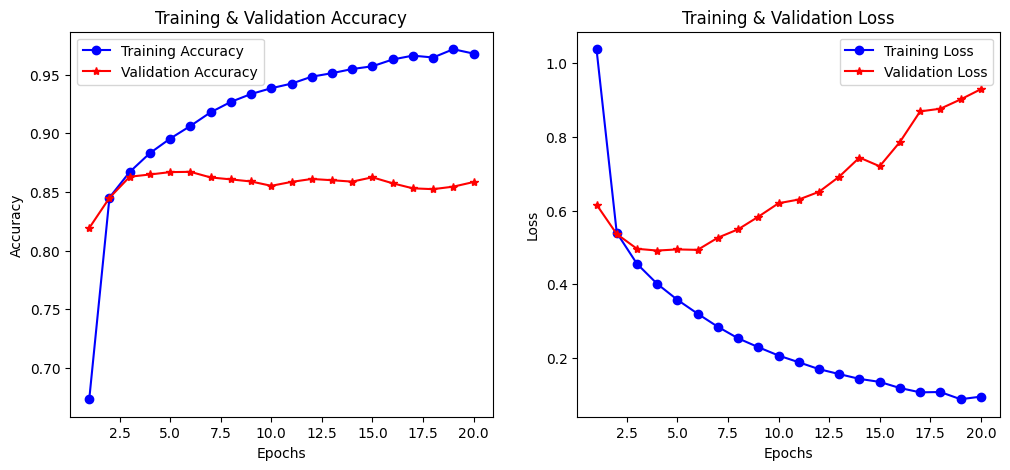

In [ ]:
import matplotlib.pyplot as plt

# plot training & validation accuracy/loss
def plot_training_history(history):

    # accuracy and loss from training history
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)  # Number of epochs

    # Training & Validation Accuracy
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo-', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'r*-', label='Validation Accuracy')
    plt.title('Training & Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Training & Validation Loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo-', label='Training Loss')
    plt.plot(epochs, val_loss, 'r*-', label='Validation Loss')
    plt.title('Training & Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Call function
plot_training_history(history_cnn_model_1)


**Observations:**  The Validation accuracy reaches it's highest level at epoch 5-6 then flattens.  There is little to no validation accuracy improvement after epoch 5-6. Training data increases steadily over each epoch, then appears to flatten out around epoch 19-20.

Let's build another model and see if we can get a better model with generalized performance.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

### **Second Model Architecture**

- Write a function that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add **LeakyRelu** with the **slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - Third Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Fourth Convolutional layer **64 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **dropout layer with the rate equal to 0.5**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **categorical_crossentropy loss, adam optimizers (learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_2 and store the model in a new variable.
- Print the summary of the model.
- Fit the model on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the second CNN model as per the above mentioned architecture.**

In [54]:
from tensorflow.keras import backend
backend.clear_session()

In [56]:
np.random.seed(55)
import random
random.seed(55)
tf.random.set_seed(55)

In [ ]:
# Import
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, LeakyReLU, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# second CNN model architecture
def cnn_model_2():
    model = Sequential()

    # First Layer
    model.add(Conv2D(16, (3, 3), padding='same', input_shape=(32, 32, 1)))
    model.add(LeakyReLU(alpha=0.1))

    # Second Layer
    model.add(Conv2D(32, (3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))

    # Max-Pooling Layer + BatchNormalization
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())

    # Third Layer
    model.add(Conv2D(32, (3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))

    # Fourth Layer
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))

    # Max-Pooling Layer + BatchNormalization
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())

    # Flatten the output
    model.add(Flatten())

    # Fully connected Dense Layer with 32 nodes
    model.add(Dense(32))
    model.add(LeakyReLU(alpha=0.1))

    # Dropout Layer to prevent overfitting
    model.add(Dropout(0.5))

    # Output Layer with softmax activation for 10 classes
    model.add(Dense(10, activation='softmax'))

    # Compile the model
    model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

    return model

# second CNN model
cnn_model_2_instance = cnn_model_2()

# model summary
cnn_model_2_instance.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 32, 32, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 16, 16, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 8, 8, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │         131,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_4 (LeakyReLU)            │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 164,362 (642.04 KB)

 Trainable params: 164,170 (641.29 KB)

 Non-trainable params: 192 (768.00 B)

In [58]:
# Train the second CNN model
history_cnn_model_2 = cnn_model_2_instance.fit(
    X_train, y_train,  # Training data
    validation_split=0.2,  # 20% of training data used for validation
    batch_size=128,  # Number of samples per batch
    epochs=30,  # Train for 30 iterations
    verbose=1  # Show training progress
)

Epoch 1/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 0.3809 - loss: 1.8068 - val_accuracy: 0.1013 - val_loss: 3.3224
Epoch 2/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7828 - loss: 0.7057 - val_accuracy: 0.7329 - val_loss: 0.9035
Epoch 3/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8295 - loss: 0.5620 - val_accuracy: 0.8830 - val_loss: 0.4196
Epoch 4/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8506 - loss: 0.4998 - val_accuracy: 0.8931 - val_loss: 0.3910
Epoch 5/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8704 - loss: 0.4338 - val_accuracy: 0.8949 - val_loss: 0.3777
Epoch 6/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8781 - loss: 0.3996 - val_accuracy: 0.8930 - val_loss: 0.4102
Epoch 7/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8866 - loss: 0.3774 - val_accuracy: 0.8894 - val_loss: 0.3893
Epoch 8/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8912 - loss: 0.3552 - val_accuracy: 

### **Plot the Training and Validation accuracies and write your observations.**

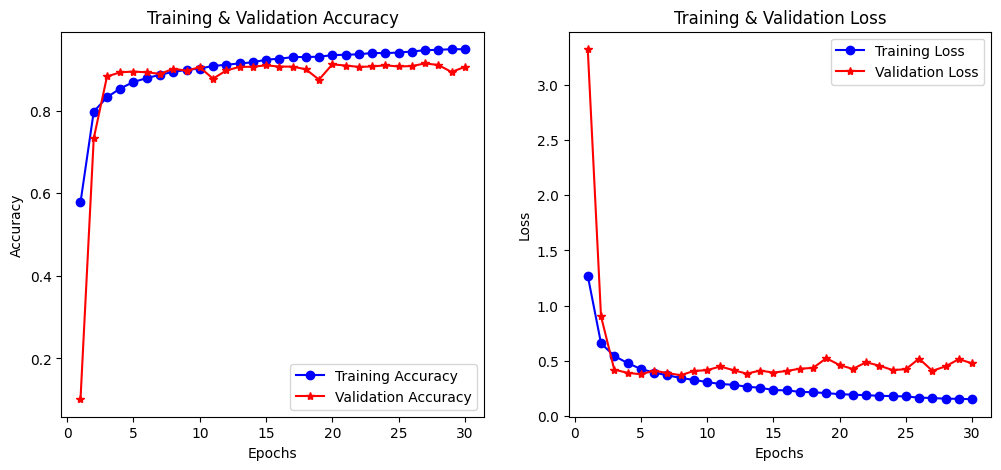

In [59]:
plot_training_history(history_cnn_model_2)

**Observations:**  The model seems to be performing well.  The training accuracy increases steadily, the validation accuracy improves and stabilizes around 90%.  There could be overfitting.

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

### **Make predictions on the test data using the second model.**

In [60]:
# Make predictions on the test data using CNN Model 2
test_pred = cnn_model_2_instance.predict(X_test)

# Convert predicted probabilities to class labels
test_pred = np.argmax(test_pred, axis=-1)

# Display the first 10 predictions
print("First 10 Test Predictions:", test_pred[:10])


563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
First 10 Test Predictions: [1 7 2 9 0 9 1 8 6 4]


**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector, but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [61]:
# Converting each entry to single label from one-hot encoded vector

y_test = np.argmax(y_test, axis = -1)

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1814
           1       0.91      0.92      0.91      1828
           2       0.93      0.92      0.93      1803
           3       0.90      0.85      0.88      1719
           4       0.95      0.89      0.92      1812
           5       0.83      0.93      0.88      1768
           6       0.91      0.89      0.90      1832
           7       0.96      0.91      0.93      1808
           8       0.89      0.89      0.89      1812
           9       0.89      0.91      0.90      1804

    accuracy                           0.91     18000
   macro avg       0.91      0.91      0.91     18000
weighted avg       0.91      0.91      0.91     18000



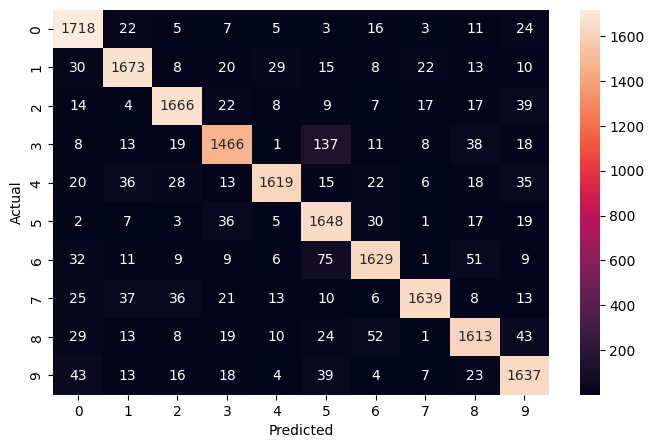

In [ ]:
# Importing required functions
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Printing the classification report
print(classification_report(y_test, test_pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_test, test_pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f')

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

### **Write your final observations on the performance of the model on the test data.**

**Final Observations:** The best model is CNN Model 2 because it has 91% accuracy and it's validation loss is stable.  The worst model is ANN Model 1 as it's Accuracy is at 67% and accuracy also flattened out early.  